<a href="https://www.kaggle.com/code/yasminemeriem12/house-prices-prediction?scriptVersionId=232121748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**EDA**

In [2]:
import pandas as pd
housing_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
housing_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
housing_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
housing_train["train"]=1
housing_test["train"]=0
all_data=pd.concat([housing_train,housing_test])
all_data[all_data.train==0].head(20)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN,0
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN,0
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,Shed,500,3,2010,WD,Normal,NaN,0
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN,0
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2010,WD,Normal,NaN,0
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,4,2010,WD,Normal,NaN,0


In [6]:
all_data_copy=all_data.copy()

In [7]:
#removing id
all_data_copy.drop("Id",axis=1,inplace=True)

In [8]:

all_data_copy["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [9]:
all_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [10]:


#notice that when the MasVnrType is na ,MasVnrArea is 0 and sometimes nul so it's a good idea to fillna MasVnrArea with 0 
all_data[all_data["MasVnrArea"].isnull()][["MasVnrType","MasVnrArea"]]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
231,NaN,NaN
246,NaN,NaN


In [11]:
housing_train["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [12]:
#investigating basement
all_data[all_data["BsmtCond"].isnull()][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1344,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1364,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
1431,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_data_copy.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [14]:
#categorical columns
df_cat=housing_train[housing_train.columns[housing_train.dtypes==object]]
df_cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [15]:
#numerical columns
df_num=housing_train[housing_train.columns[housing_train.dtypes!=object]]
df_num.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
train              0
dtype: int64

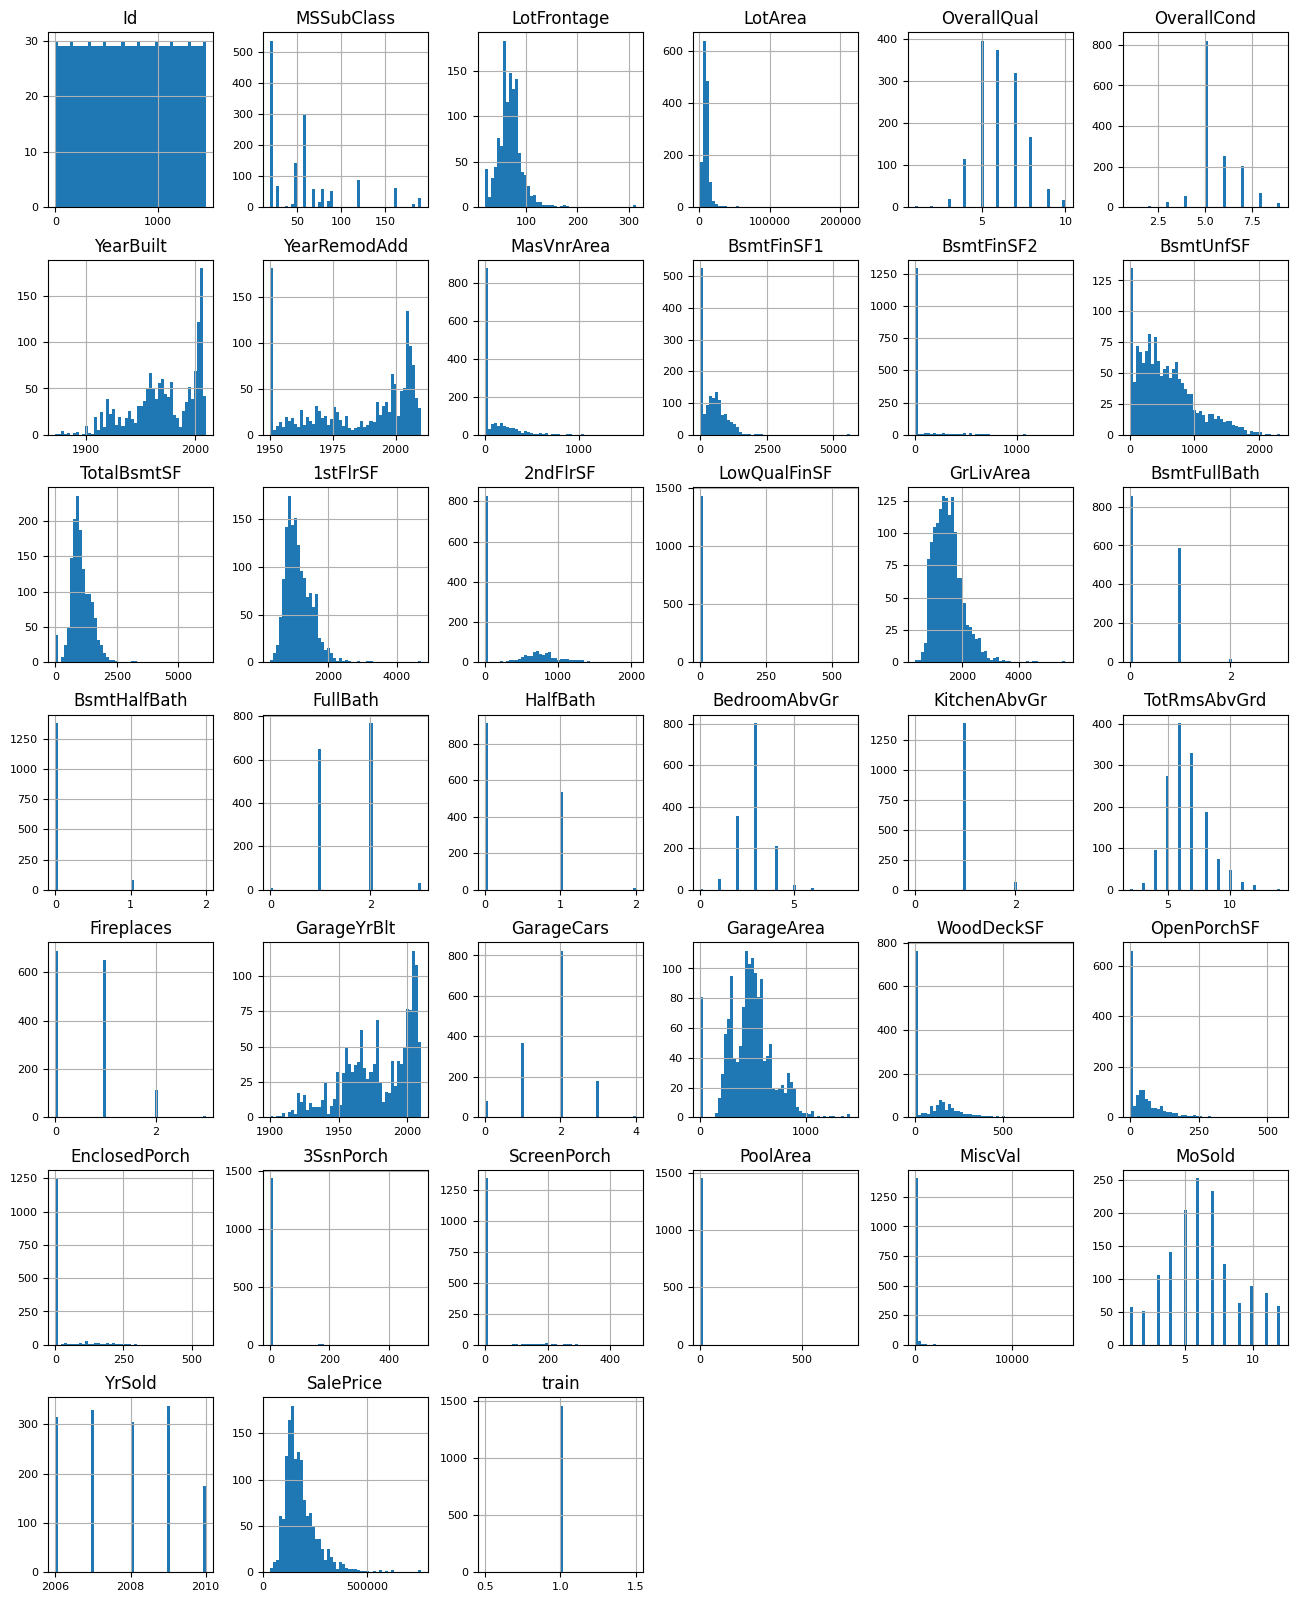

In [16]:
#distribution of numerical columns
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


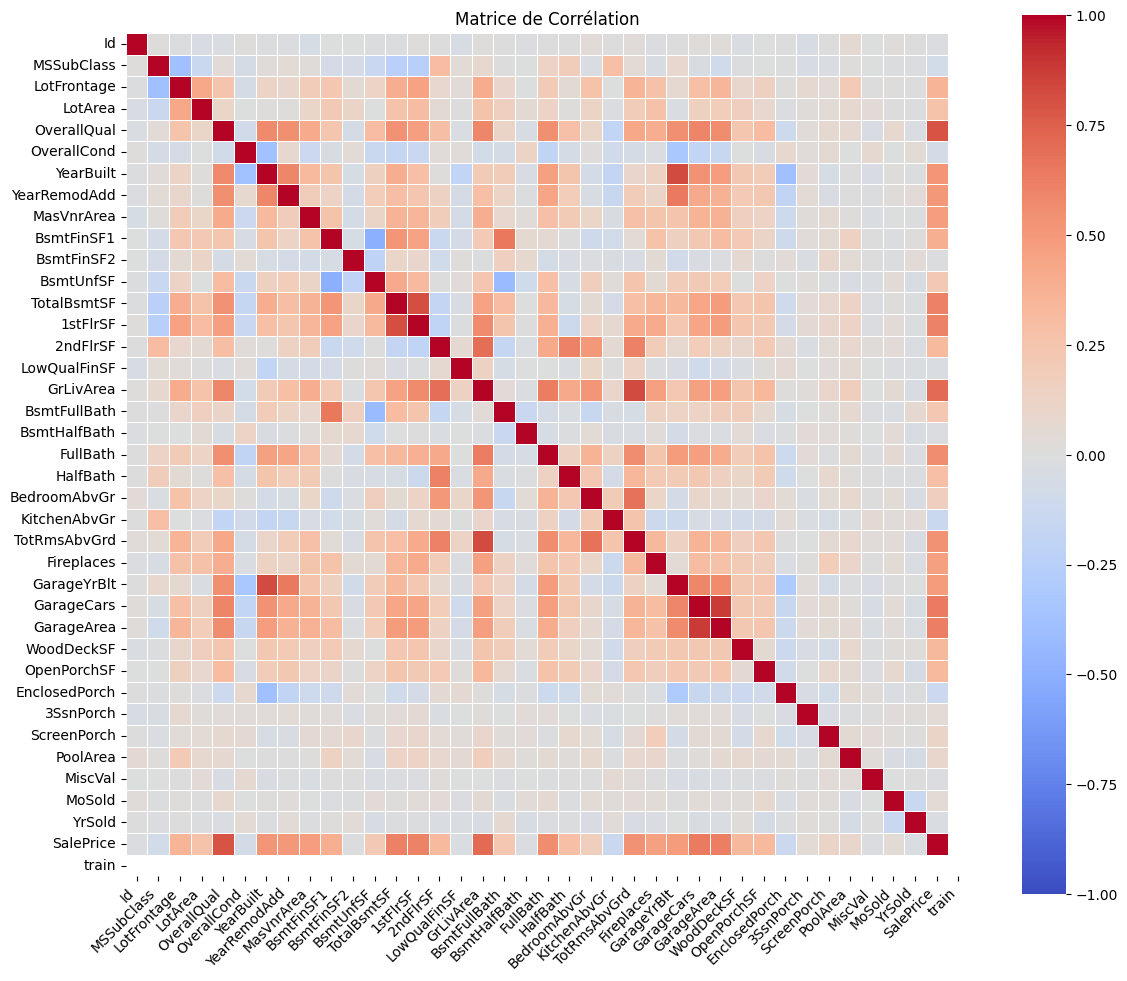

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation numerical features
df_num = housing_train[housing_train.columns[housing_train.dtypes != object]]


plt.figure(figsize=(12, 10))  # Ajuste la taille du graphique
corr = df_num.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5)
plt.xticks(rotation=45, ha='right')  # Faire pivoter les labels sur l'axe x
plt.yticks(rotation=0)               # ou rotation=45 selon vos préférences
plt.title("Matrice de Corrélation")
plt.tight_layout()                   # Ajuster les marges
plt.show()


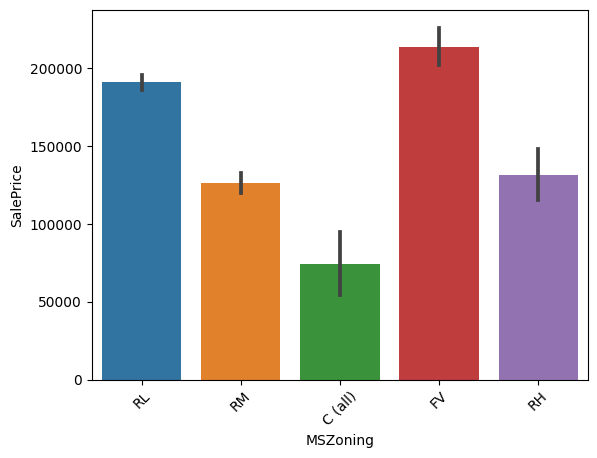

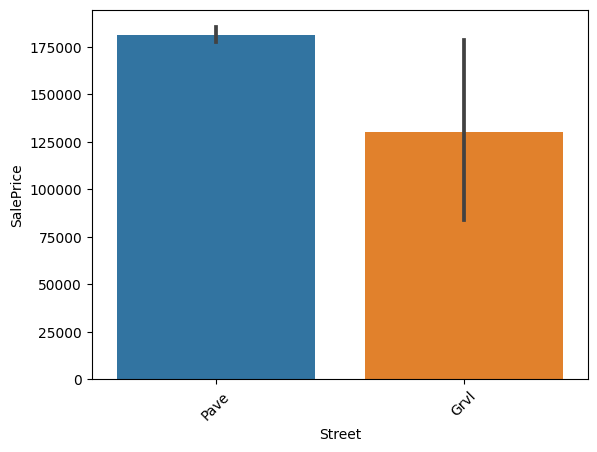

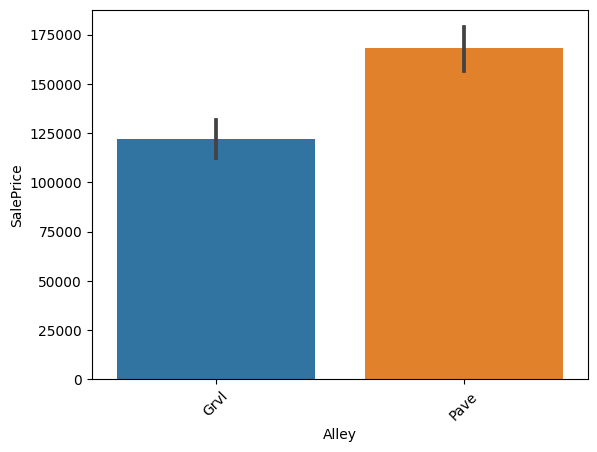

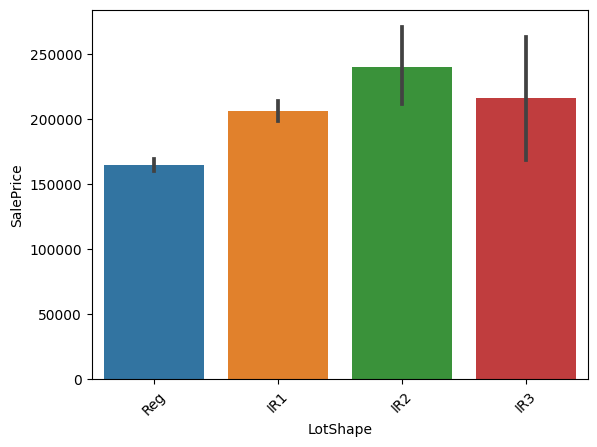

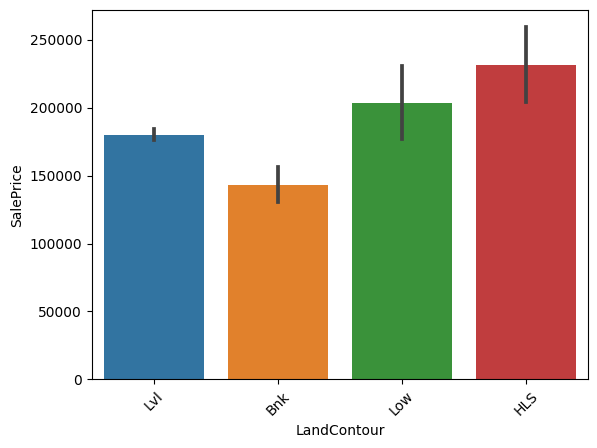

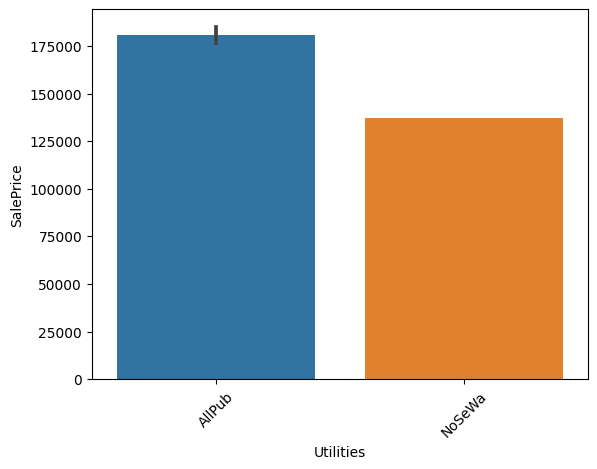

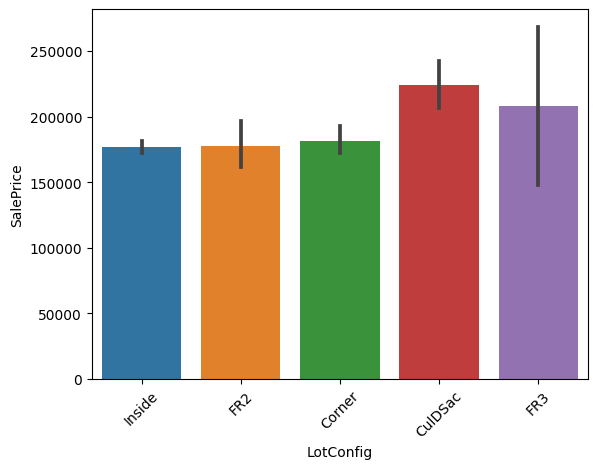

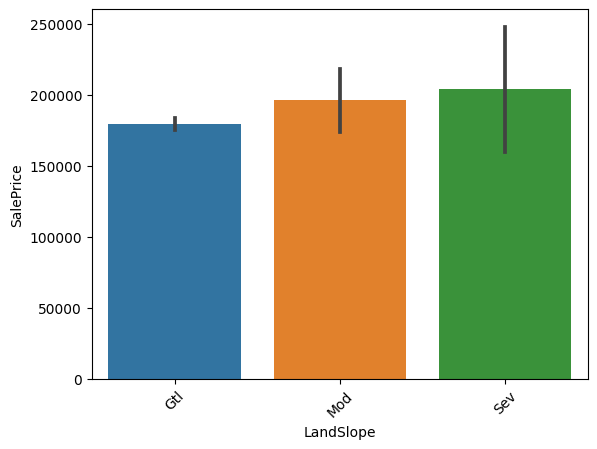

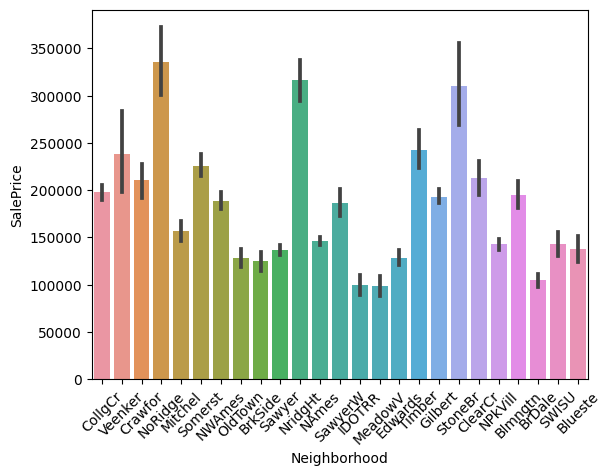

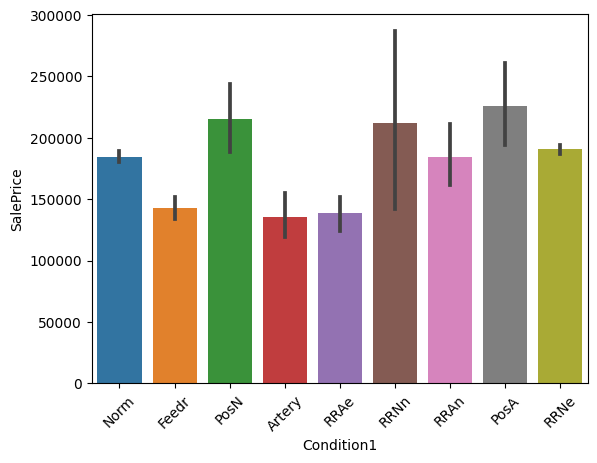

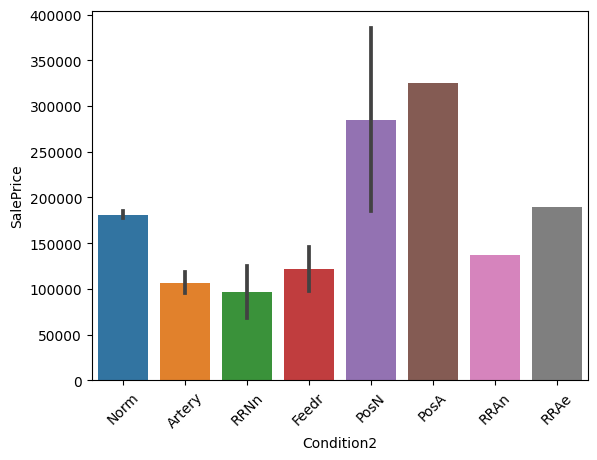

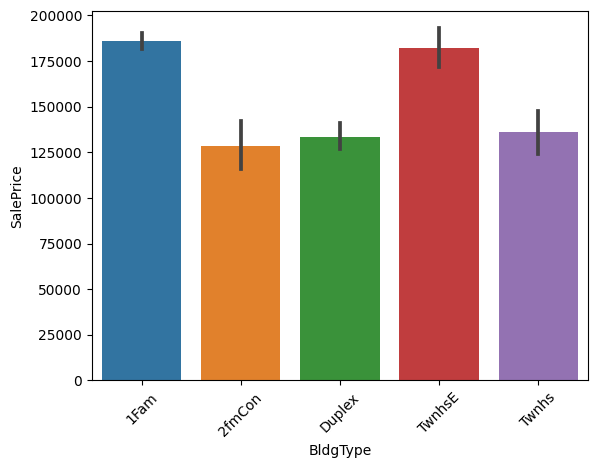

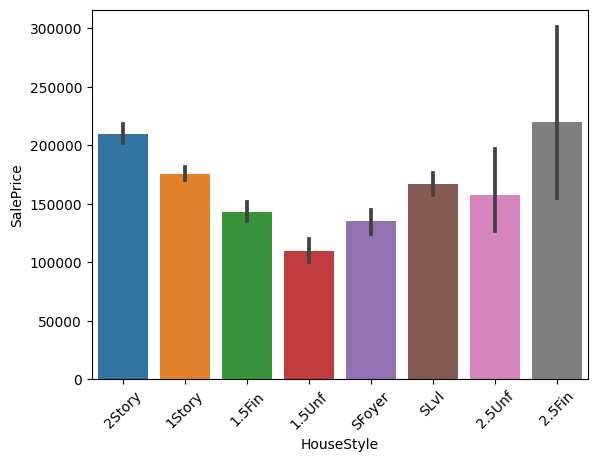

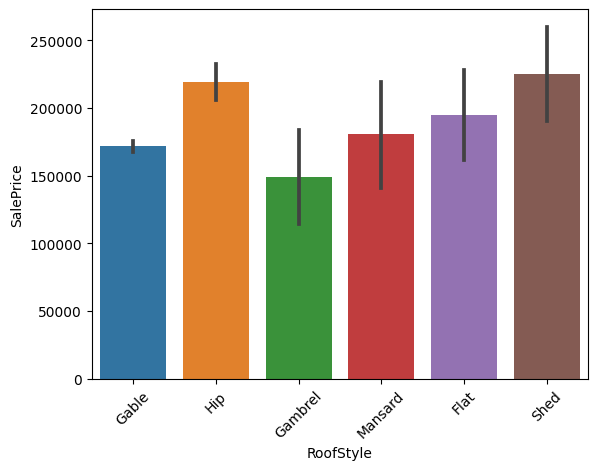

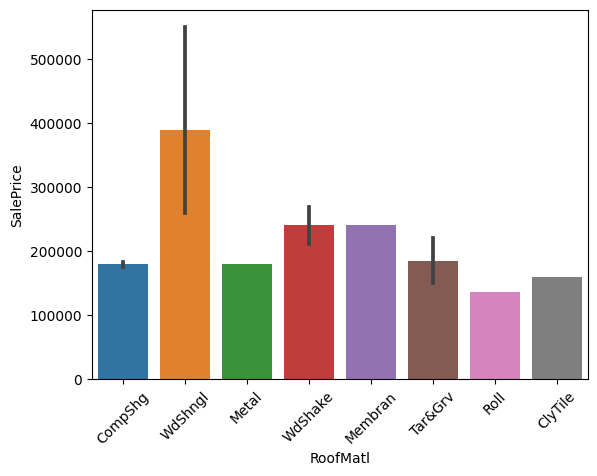

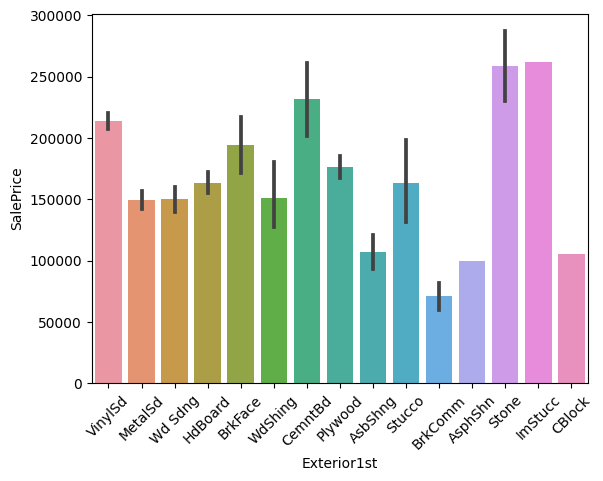

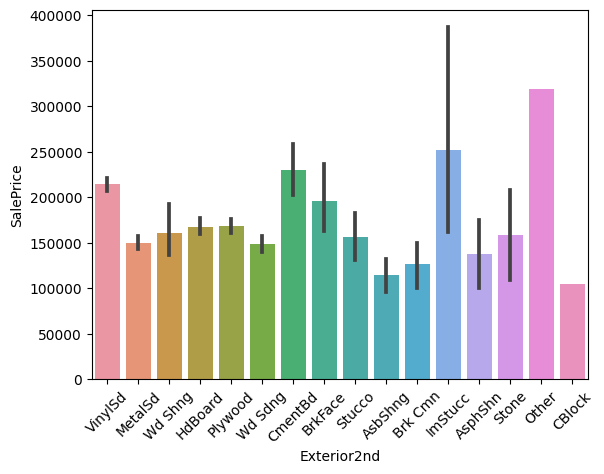

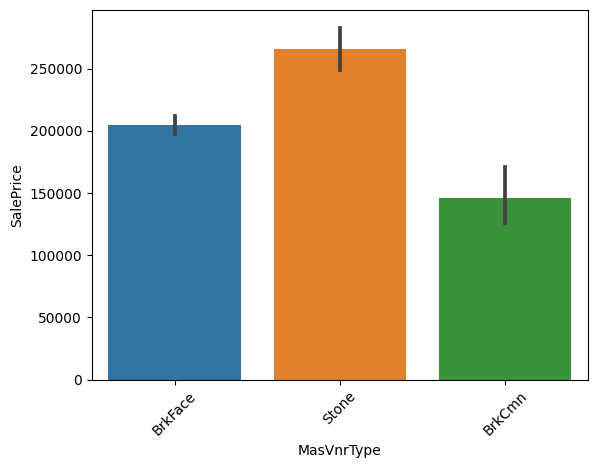

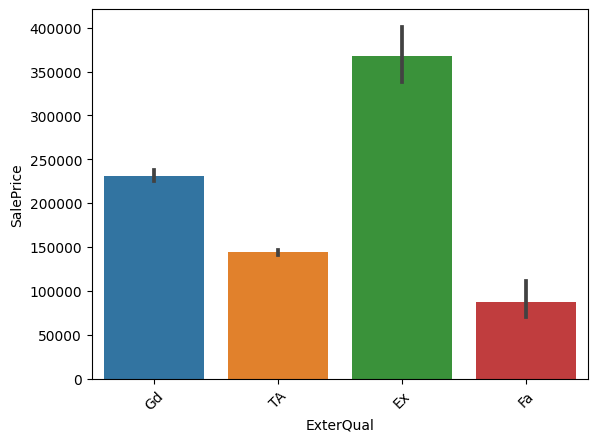

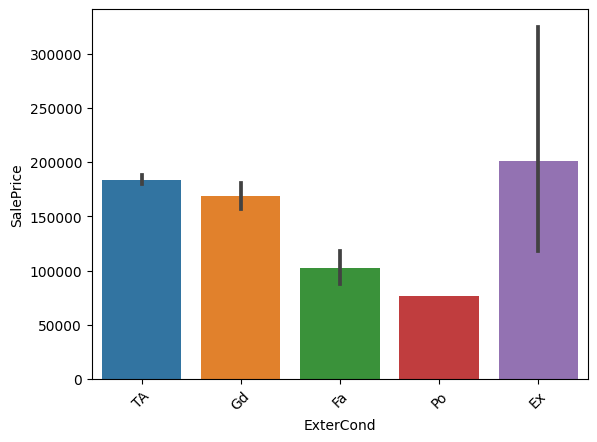

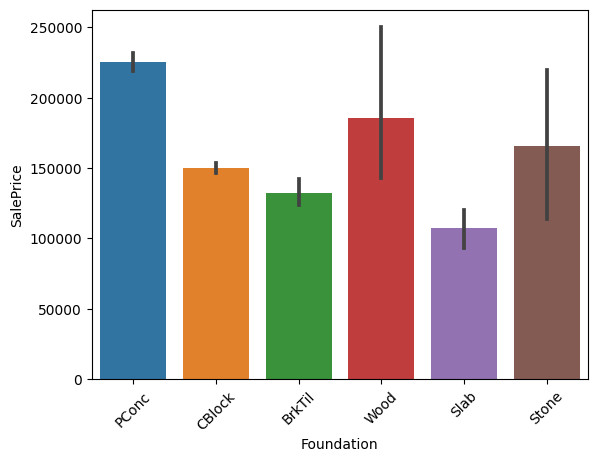

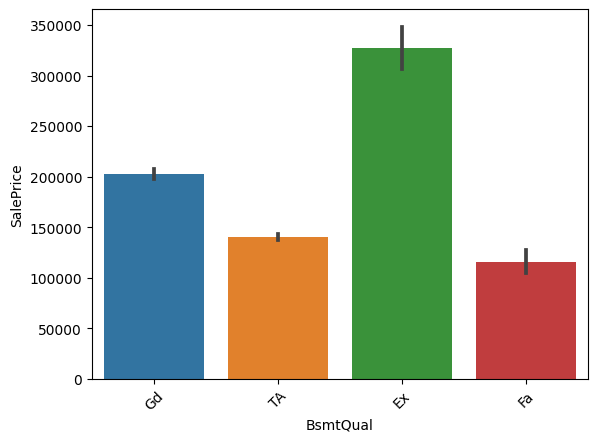

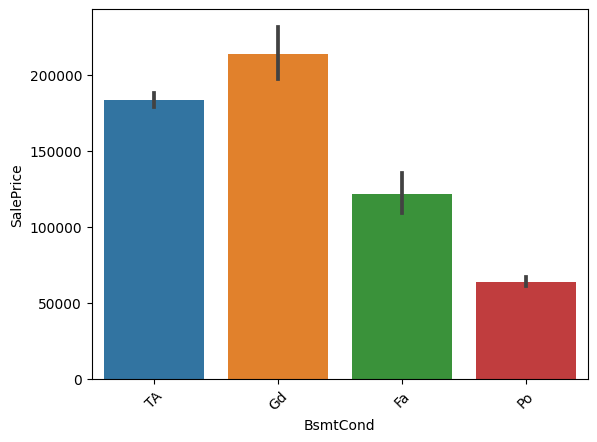

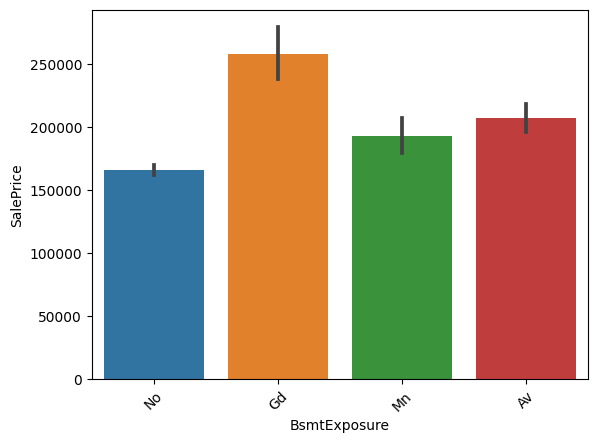

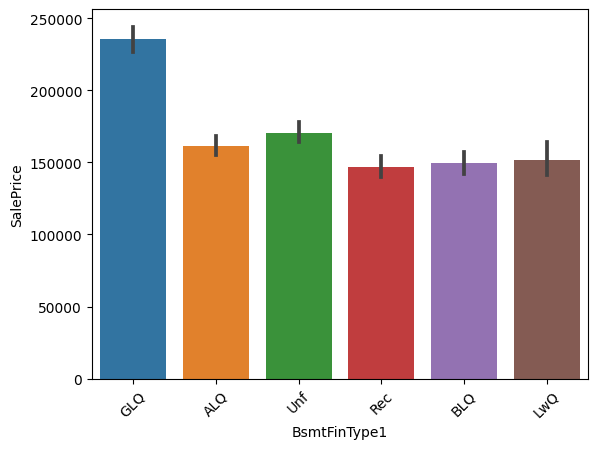

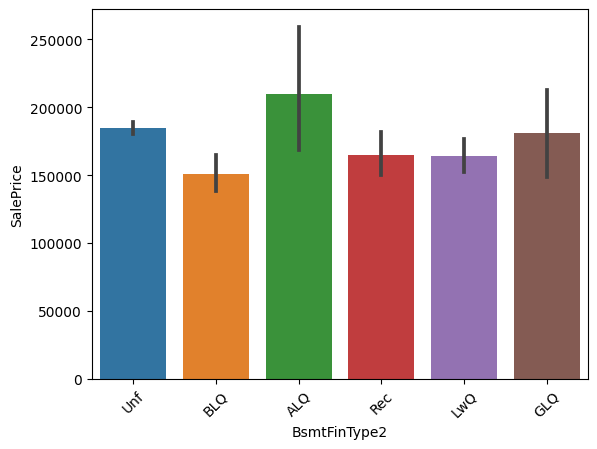

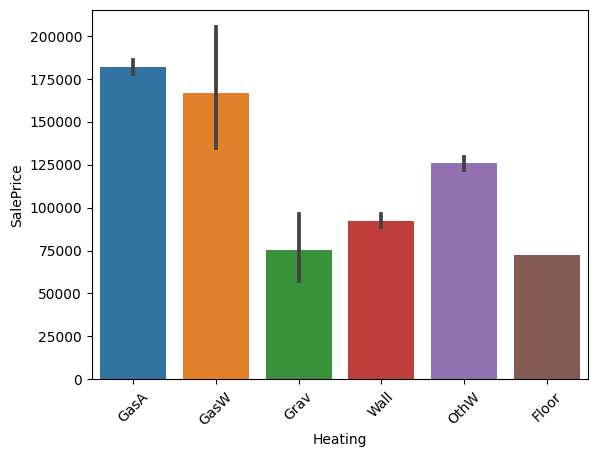

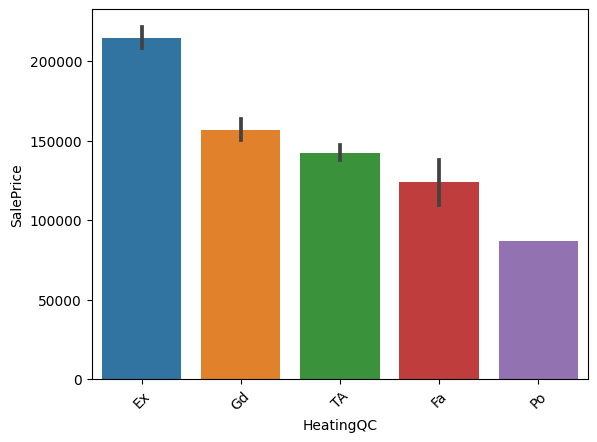

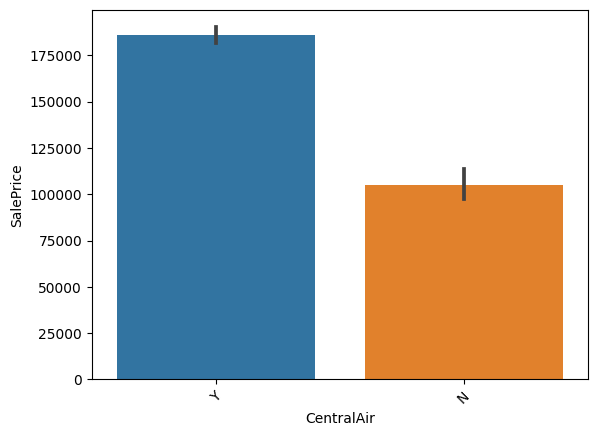

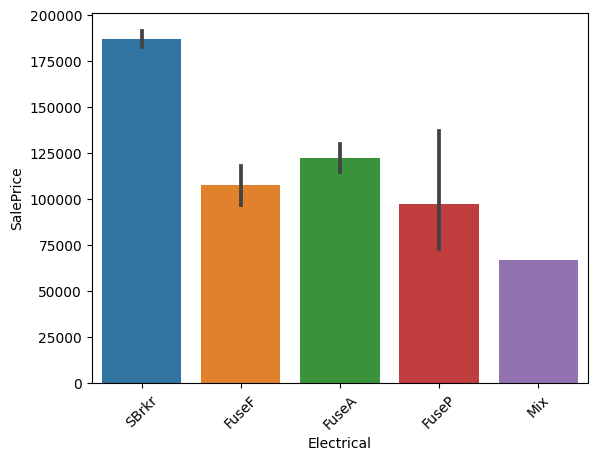

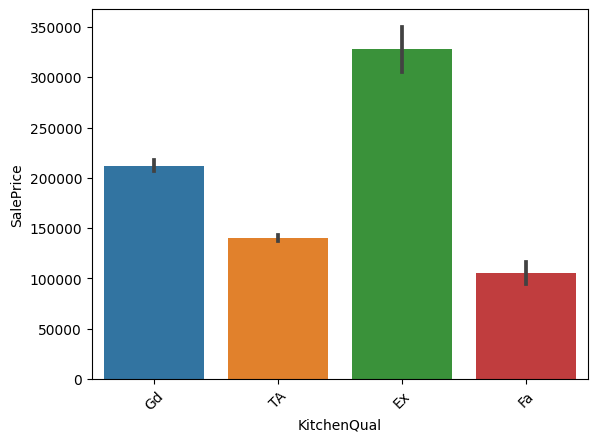

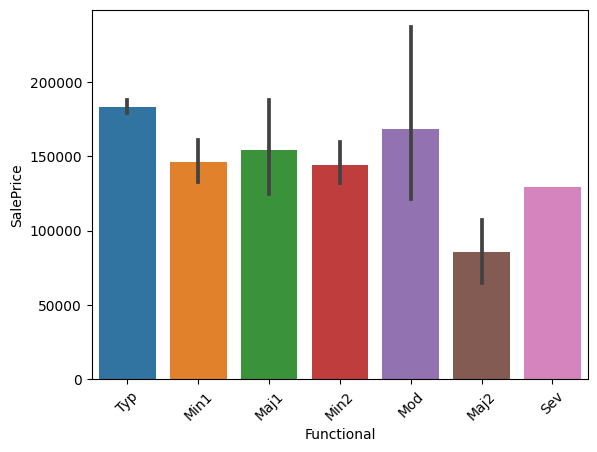

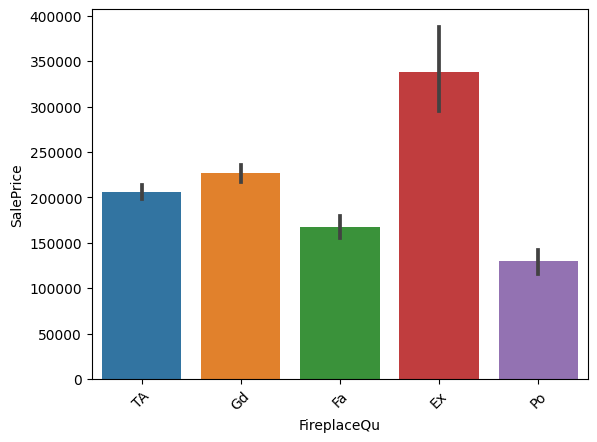

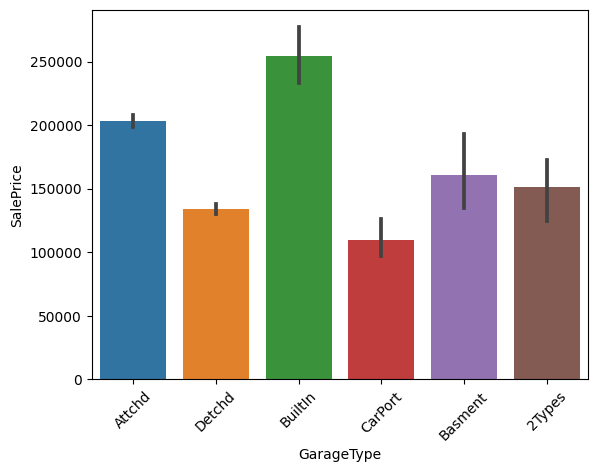

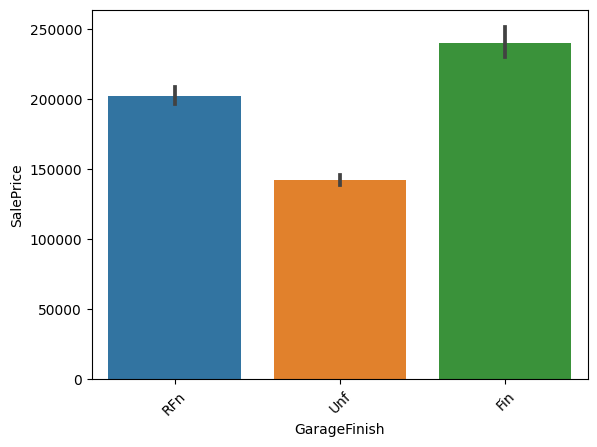

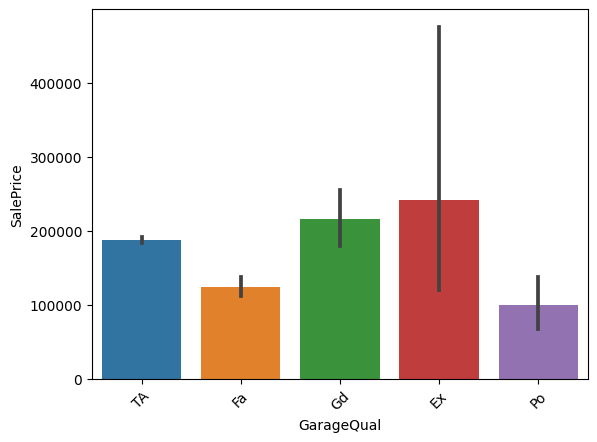

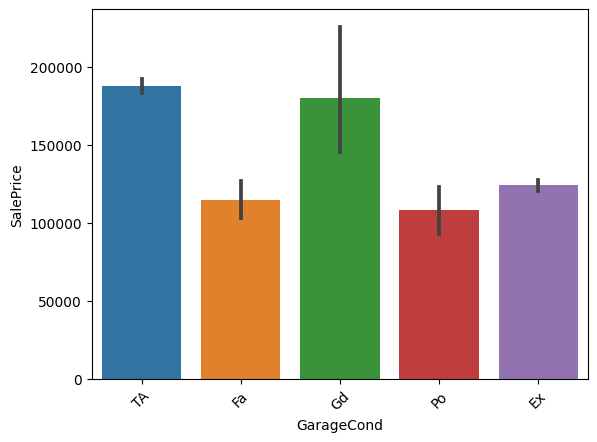

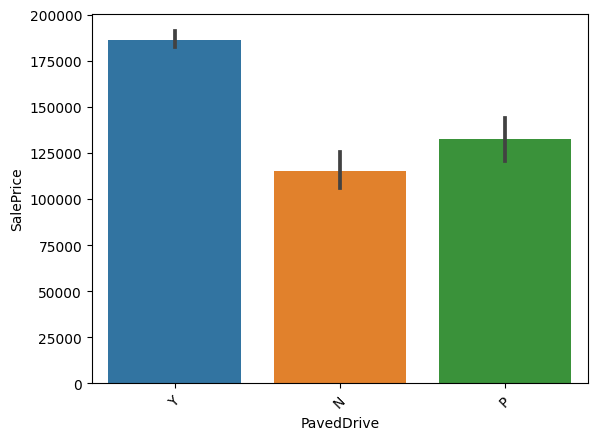

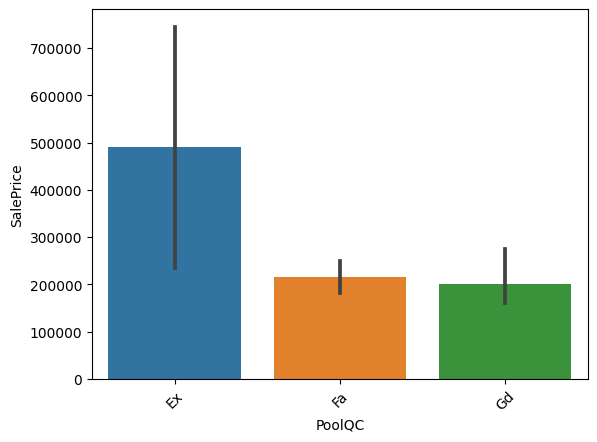

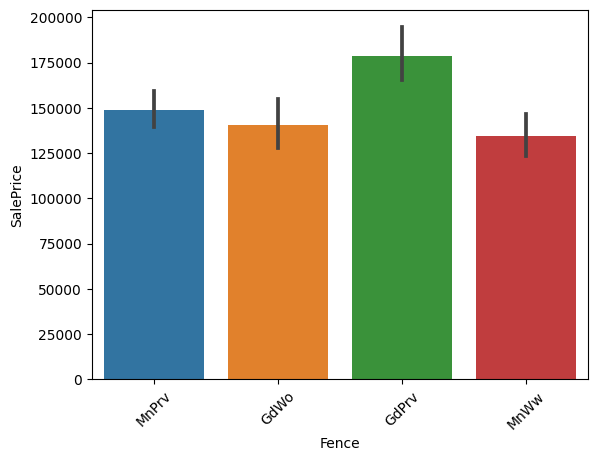

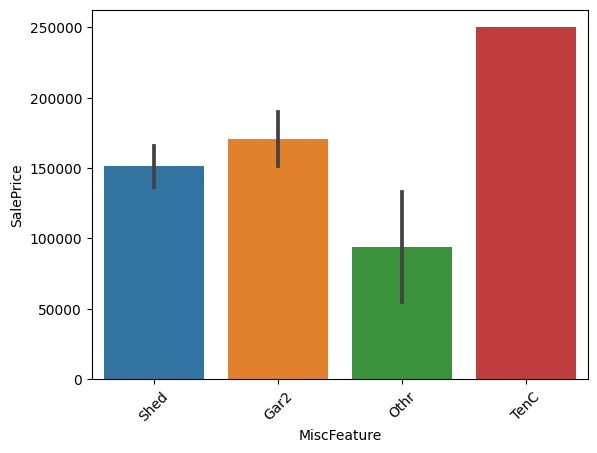

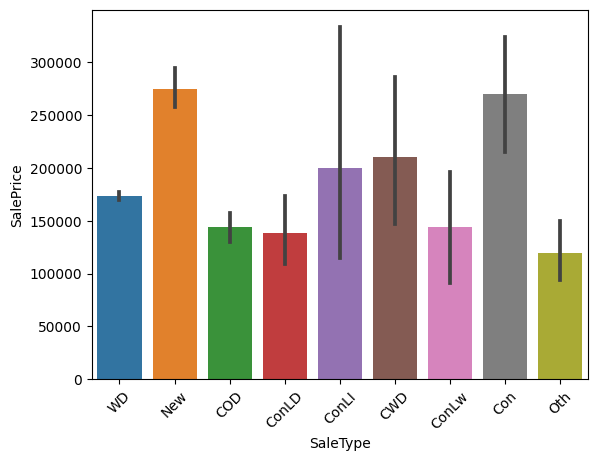

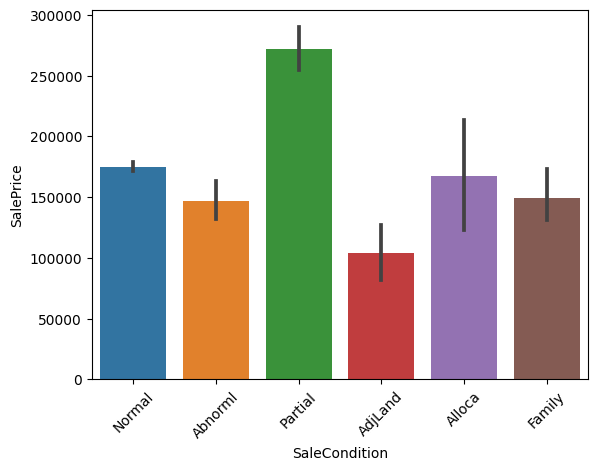

In [18]:
cat_col=housing_train.columns[housing_train.dtypes==object].to_list()
for element in cat_col:
    sns.barplot(data=housing_train,x=element,y="SalePrice")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
#in that case it's about houses that has no basement so it's better to set it as a none category
all_data_copy.loc[
    (all_data_copy.BsmtQual.isnull()) & (all_data_copy.BsmtCond.isnull()),
    ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
] = "None"

In [20]:
all_data_copy.loc[all_data_copy.PoolQC.isna() & all_data_copy.PoolArea!=0,["PoolQC","train"]]

,PoolQC,train
1139,NaN,0


In [21]:
#one instance where we actually have a pool but poolqc missing
all_data_copy[all_data_copy.PoolQC.isna() & all_data_copy.PoolArea!=0][["PoolArea","PoolQC","train"]]
all_data_copy.loc[all_data_copy.PoolQC.isna() & all_data_copy.PoolArea!=0,"PoolQC"]=all_data_copy["PoolQC"][all_data_copy.train==0].mode()[0]

In [22]:
all_data_copy.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            2
BsmtCond            3
BsmtExposure        3
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [23]:
#preprocessing data

all_data_copy[["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]]=all_data_copy[["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]].fillna(0)
all_data_copy[['Alley','MasVnrType',"FireplaceQu","PoolQC","GarageType","GarageFinish","GarageQual","GarageCond","Fence","MiscFeature"]]=all_data_copy[['Alley','MasVnrType',"FireplaceQu","PoolQC","GarageType","GarageFinish","GarageQual","GarageCond","Fence","MiscFeature"]].fillna('None')


In [24]:
all_data_copy.loc[
    all_data_copy.train == 0, "LotFrontage"
] = all_data_copy.loc[
    all_data_copy.train == 0, "LotFrontage"
].fillna(all_data_copy.loc[all_data_copy.train == 0, "LotFrontage"].mean())

all_data_copy.loc[
    all_data_copy.train == 1, "LotFrontage"
] = all_data_copy.loc[
    all_data_copy.train == 1, "LotFrontage"
].fillna(all_data_copy.loc[all_data_copy.train == 1, "LotFrontage"].mean())


In [25]:
all_data[all_data["MasVnrArea"].isnull()][["MasVnrType","MasVnrArea"]]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
231,NaN,NaN
246,NaN,NaN


In [26]:
all_data_copy[all_data_copy.LotFrontage.isnull()& all_data_copy.train==1].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train


In [27]:
col_cat=housing_train.columns[housing_train.dtypes==object].to_list()
col_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
all_data_copy[col_cat][all_data_copy.train==1].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     1
BsmtFinType1     0
BsmtFinType2     1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [29]:
col_num=all_data_copy.columns[all_data_copy.dtypes!=object].to_list()
all_data_copy[col_num][all_data_copy.train==1].isna().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
train             0
dtype: int64

In [30]:
all_data_copy[["GarageType",'GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageCars','GarageArea']][all_data_copy.GarageYrBlt.isna()].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,None,None,None,None,NaN,0.0,0.0
48,None,None,None,None,NaN,0.0,0.0
78,None,None,None,None,NaN,0.0,0.0
88,None,None,None,None,NaN,0.0,0.0
89,None,None,None,None,NaN,0.0,0.0


In [31]:
#2 missing values normalement 0 for both
all_data_copy[all_data_copy.BsmtQual=="None"][["BsmtFullBath","BsmtHalfBath"]]

,BsmtFullBath,BsmtHalfBath
17,0.0,0.0
39,0.0,0.0
90,0.0,0.0
102,0.0,0.0
156,0.0,0.0
182,0.0,0.0
259,0.0,0.0
342,0.0,0.0
362,0.0,0.0
371,0.0,0.0


In [32]:
#we could say that in the case where there's no garage the garage was built the same year as the house
all_data_copy['GarageYrBlt'] = all_data_copy['GarageYrBlt'].fillna(all_data_copy['YearBuilt'])


In [33]:
col_mod=["Exterior1st","Exterior2nd",'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"Electrical","KitchenQual","Functional","MSZoning","Utilities","SaleType"]
for element in col_mod:
   all_data_copy.loc[all_data_copy.train == 1, element] = all_data_copy.loc[all_data_copy.train == 1, element].fillna(all_data_copy.loc[all_data_copy.train == 1, element].mode()[0])
   all_data_copy.loc[all_data_copy.train == 0, element] = all_data_copy.loc[all_data_copy.train == 0, element].fillna(all_data_copy.loc[all_data_copy.train == 0, element].mode()[0])

In [34]:
all_data_copy.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [35]:
all_data_copy_encoded=pd.get_dummies(all_data_copy,drop_first=True,dtype=int)
all_data_copy_encoded.head()
all_data_copy_encoded.shape

(2919, 261)

# **Defining X and y**

In [36]:
X_train=all_data_copy_encoded[all_data_copy_encoded.train==1]
X_train=X_train.drop(["SalePrice","train"],axis=1)


In [37]:
X_train.shape

(1460, 259)

In [38]:
X_train.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSZoning_FV              0
M

In [39]:
y_train=all_data_copy_encoded[all_data_copy_encoded.train==1]["SalePrice"]


In [40]:
y_train.shape

(1460,)

In [41]:
X_test=all_data_copy_encoded[all_data_copy_encoded.train==0]
X_test=X_test.drop(["SalePrice","train"],axis=1)


In [42]:
X_test.shape

(1459, 259)

# Modeling

In [43]:
#with random forest first
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
rf_pipeline = Pipeline([
    ("st_scaler", StandardScaler()),
    ("rf_model", RandomForestRegressor())
])
scores = cross_val_score(rf_pipeline,X_train,y_train,
scoring="neg_mean_squared_error",cv=10)

In [44]:
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE:", final_avg_rmse)

Final RMSE: 29248.41377109366


In [45]:
import xgboost as xgb
#with xgboost
xgb_pipeline = Pipeline([
    ("st_scaler", StandardScaler()),
    ("xgb_model", xgb.XGBRegressor(objective="reg:squarederror",random_state=42))
])
scores = cross_val_score(rf_pipeline,X_train,y_train,
scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE:", final_avg_rmse)

Final RMSE: 28992.354197492234


In [46]:
import xgboost as xgb
#with xgboost
xgb_pipeline = Pipeline([
    ("st_scaler", StandardScaler()),
    ("xgb_model", xgb.XGBRegressor(random_state=42))
])
scores = cross_val_score(rf_pipeline,X_train,y_train,
scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE:", final_avg_rmse)

Final RMSE: 28980.710852599423


In [47]:
#with gridsearch
from sklearn.model_selection import GridSearchCV
gbm_param_grid = {
'xgb_model__learning_rate': [0.01, 0.1, 0.5, 0.9],
    'xgb_model__n_estimators': [200],
    'xgb_model__subsample': [0.3, 0.5, 0.9]} 


grid_mse = GridSearchCV(estimator=xgb_pipeline,param_grid=gbm_param_grid,scoring="neg_mean_squared_error",cv=4,verbose=1)
grid_mse.fit(X_train,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('st_scaler', StandardScaler()),
                                       ('xgb_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             param_grid={'xgb_model__learning_rate': [0.01, 0.1, 0.5, 0.9],
                         'xgb_model__n_estimators': [200],
                         'xgb_model__subsample': [0.3, 0.5, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
print("Best rmse: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best rmse:  28046.11409967299


In [49]:
predictions = grid_mse.predict(X_test)

In [50]:
predictions

array([124306.74, 155953.2 , 178263.1 , ..., 168240.52, 112045.94,
       214040.06], dtype=float32)

In [51]:
housing_test["SalePrice"]=predictions


In [52]:
outpout=housing_test[["Id","SalePrice"]]

In [53]:
outpout.to_csv("result.csv",index=False)